# Numerical Analysis: Final Project

##### Packages

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Functions

In [59]:
def spline_poly_i(x, i, cs):
    a, b, c, d = cs.c[:, i]
    x0 = cs.x[i]
    return a*(x - x0)**3 + b*(x - x0)**2 + c*(x - x0) + d

# Section A: Mach Number Computation & Error Analysis

In [60]:
pressure = pd.read_csv('/Users/ben_nicholson/Documents/vs_code/school_work/numerical_analysis/final_project/datasets/Pressure_78s.csv')
accel = pd.read_csv('/Users/ben_nicholson/Documents/vs_code/school_work/numerical_analysis/final_project/datasets/Accel_Z-1.csv')

In [61]:
pressure.head()

,t_s,P_static_Pa,P_dynamic_Pa
0,0.000000,1863.512334,2508.415278
1,0.005002,1855.614484,2506.033330
2,0.010003,1862.152258,2515.220666
3,0.015005,1853.919862,2515.968669
4,0.020007,1861.199153,2515.454730


In [62]:
accel.head()

,t_s,Accel_m_per_s2
0,0.000000,10.766043
1,0.040013,11.351193
2,0.080027,10.691564
3,0.120040,10.238034
4,0.160053,10.141102


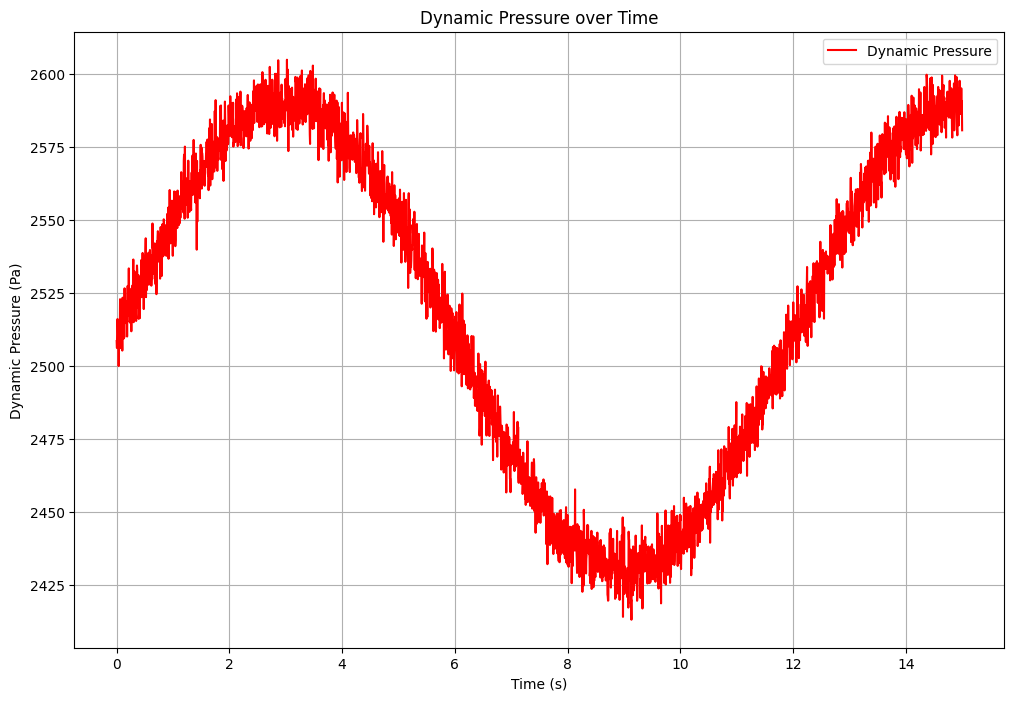

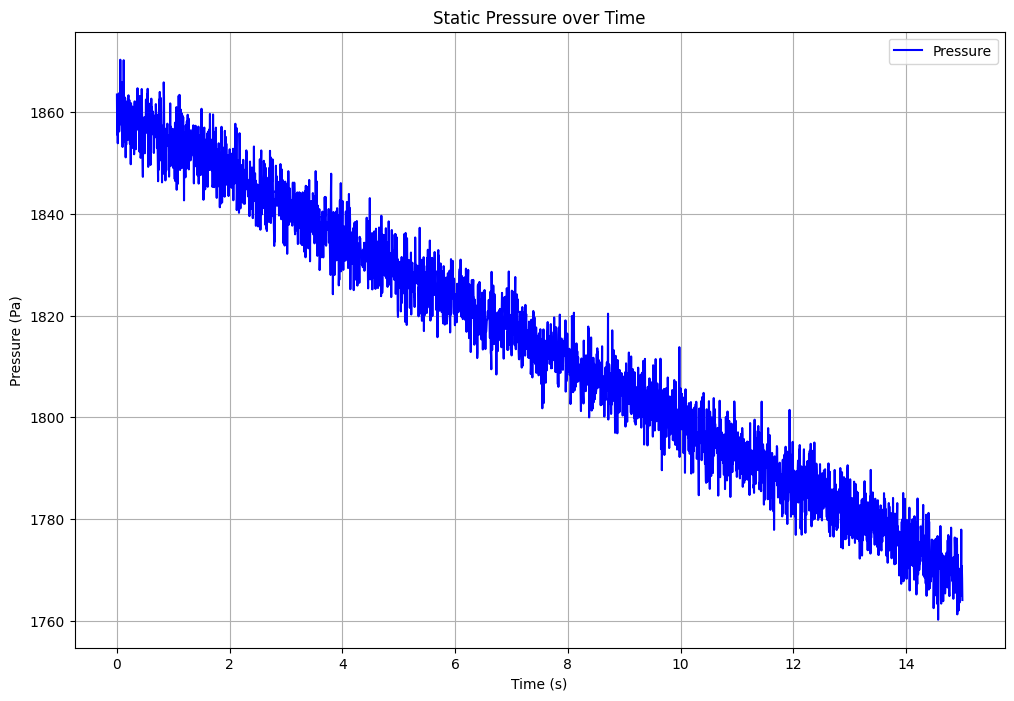

In [63]:
# Plot of the dynamic pressure over time
plt.figure(figsize=(12,8))
plt.plot(pressure['t_s'].to_numpy(), pressure['P_dynamic_Pa'].to_numpy(), label='Dynamic Pressure', color='red')
plt.title('Dynamic Pressure over Time')
plt.xlabel('Time (s)')
plt.ylabel('Dynamic Pressure (Pa)')
plt.legend()
plt.grid()
plt.show()

# Plot of the static pressure over time
plt.figure(figsize=(12,8))
plt.plot(pressure['t_s'].to_numpy(), pressure['P_static_Pa'].to_numpy(), label='Pressure', color='blue')
plt.title('Static Pressure over Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid()
plt.show()

We are going to fit the function for the dynamic and static pressures

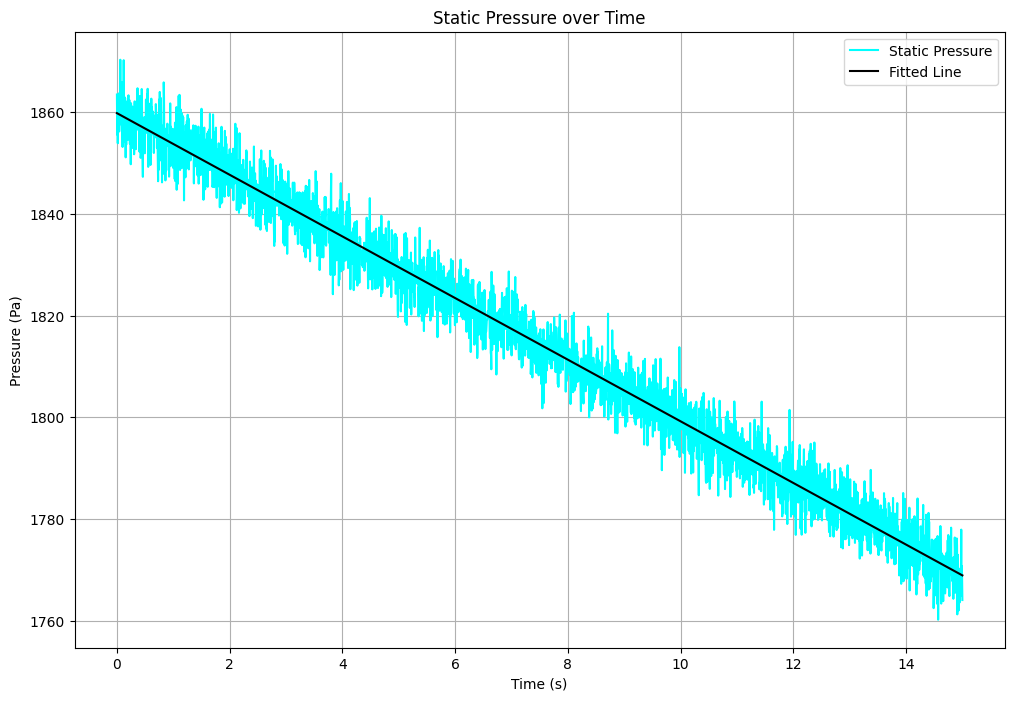

Optimized parameters (popt): [  -6.06364465 1859.84840884]
Covariance of parameters (pcov): [[ 0.00028491 -0.00213685]
 [-0.00213685  0.0213721 ]]
Errors in parameters (errors): [0.01687939 0.14619199]
Slope (a): -6.0636446473329775
Intercept (b): 1859.8484088389466
Fitted linear function: y = -6.06x + 1859.85


In [64]:
# Plot of the static pressure over time with a linear line
def plot_static_pressure():
    """
    Plot the static pressure over time with the static pressure. 
    """
    plt.figure(figsize=(12,8))
    plt.plot(pressure['t_s'].to_numpy(), pressure['P_static_Pa'].to_numpy(), label='Static Pressure', color='cyan')
    plt.title('Static Pressure over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Pressure (Pa)')
    def linear_function(x, a, b):
        """
        Linear function for curve fitting.
        """
        return a * x + b
    # Fit the data to a linear function
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(linear_function, pressure['t_s'].to_numpy(), pressure['P_static_Pa'].to_numpy())
    a, b = popt
    # Generate x values for the fitted line
    x_fit = np.linspace(pressure['t_s'].min(), pressure['t_s'].max(), 100)
    # Generate y values for the fitted line
    y_fit = linear_function(x_fit, a, b)
    # Plot the fitted line
    plt.plot(x_fit, y_fit, color='black', label='Fitted Line')
    plt.legend()
    plt.grid()
    plt.show()

    # Print the linear function parameters and covariance matrix and the errors
    print("Optimized parameters (popt):", popt)
    print("Covariance of parameters (pcov):", pcov)
    print("Errors in parameters (errors):", np.sqrt(np.diag(pcov)))
    print("Slope (a):", a)
    print("Intercept (b):", b)
    print("Fitted linear function: y = {:.2f}x + {:.2f}".format(a, b))

plot_static_pressure()

Above, you can see the linear function parameters with the best fit linear function for the static pressure. 

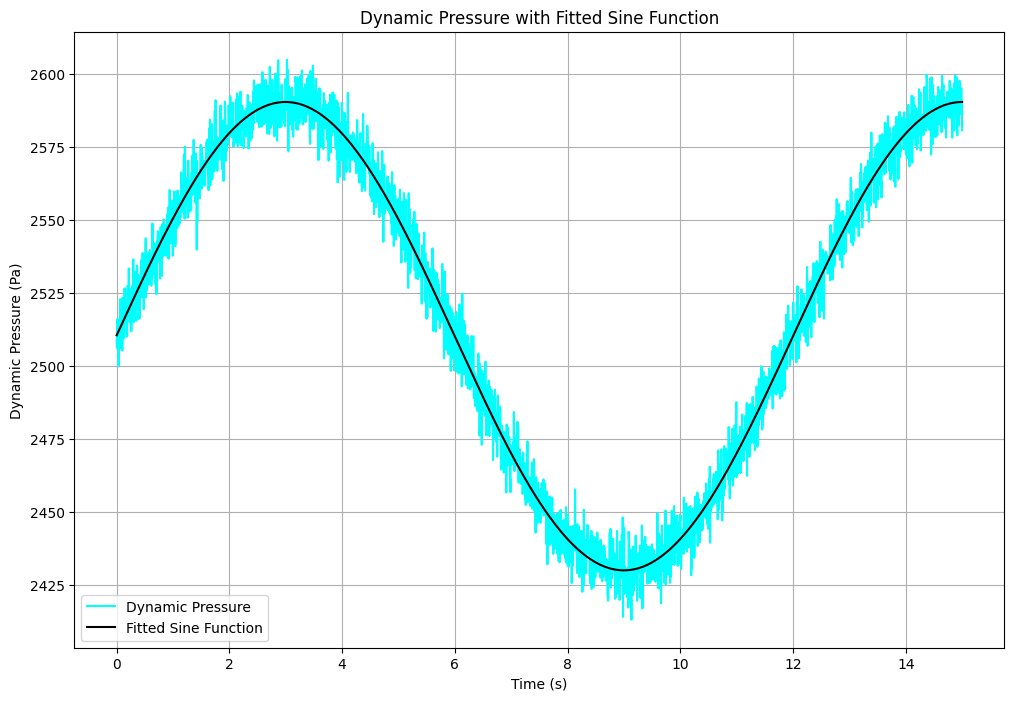

Optimized parameters (popt): [8.01947842e+01 5.23264275e-01 3.94494154e-03 2.51009416e+03]
Covariance of parameters (pcov): [[ 2.48867396e-02  2.69104103e-06 -4.98205287e-05 -3.02267607e-03]
 [ 2.69104103e-06  2.10433771e-07 -1.51608208e-06 -1.30352265e-05]
 [-4.98205287e-05 -1.51608208e-06  1.47892056e-05  5.84013587e-05]
 [-3.02267607e-03 -1.30352265e-05  5.84013587e-05  1.34445160e-02]]
Errors in parameters (sqrt of diagonal of covariance matrix): [0.15775532 0.00045873 0.00384567 0.11595049]
Amplitude (a): 80.1947842459364
Frequency (b): 0.523264274774453
Phase shift (c): 0.003944941540179304
Vertical shift (d): 2510.0941634439178
Fitted sine function: y = 80.19 * sin(0.52 * x + 0.00) + 2510.09


In [65]:
def plot_dynamic_pressure():
    """
    A sine function to match the dynamic pressure data.
    """
    # Define the sine function
    def sine_function(x, a, b, c, d):
        """
        Sine function to fit the data.
        :param x: Input value
        :param a: Amplitude
        :param b: Frequency
        :param c: Phase shift
        :param d: Vertical shift
        :return: Sine value
        """
        return a * np.sin(b * x + c) + d

    # Fit the data to the sine function
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(sine_function, pressure['t_s'].to_numpy(), pressure['P_dynamic_Pa'].to_numpy(), p0=[98, np.pi/6, 0, 2500])
    a, b, c, d = popt

    # Generate x values for the fitted sine function
    x_fit = np.linspace(pressure['t_s'].min(), pressure['t_s'].max(), 1000)
    y_fit = sine_function(x_fit, a, b, c, d)

    # Plot the dynamic pressure data
    plt.figure(figsize=(12, 8))
    plt.plot(pressure['t_s'].to_numpy(), pressure['P_dynamic_Pa'].to_numpy(), label='Dynamic Pressure', color='cyan')
    plt.plot(x_fit, y_fit, label='Fitted Sine Function', color='black')
    plt.title('Dynamic Pressure with Fitted Sine Function')
    plt.xlabel('Time (s)')
    plt.ylabel('Dynamic Pressure (Pa)')
    plt.legend()
    plt.grid()
    plt.show()

    # Print the sine function parameters and covariance matrix and the errors
    print("Optimized parameters (popt):", popt)
    print("Covariance of parameters (pcov):", pcov) 
    print("Errors in parameters (sqrt of diagonal of covariance matrix):", np.sqrt(np.diag(pcov)))
    print("Amplitude (a):", a)
    print("Frequency (b):", b)
    print("Phase shift (c):", c)
    print("Vertical shift (d):", d)
    print("Fitted sine function: y = {:.2f} * sin({:.2f} * x + {:.2f}) + {:.2f}".format(a, b, c, d))

# Call the function to plot the dynamic pressure
plot_dynamic_pressure()

Above we can see a sin function that maps the dynamic pressure data well for it. There are also given parameters that we can now use.

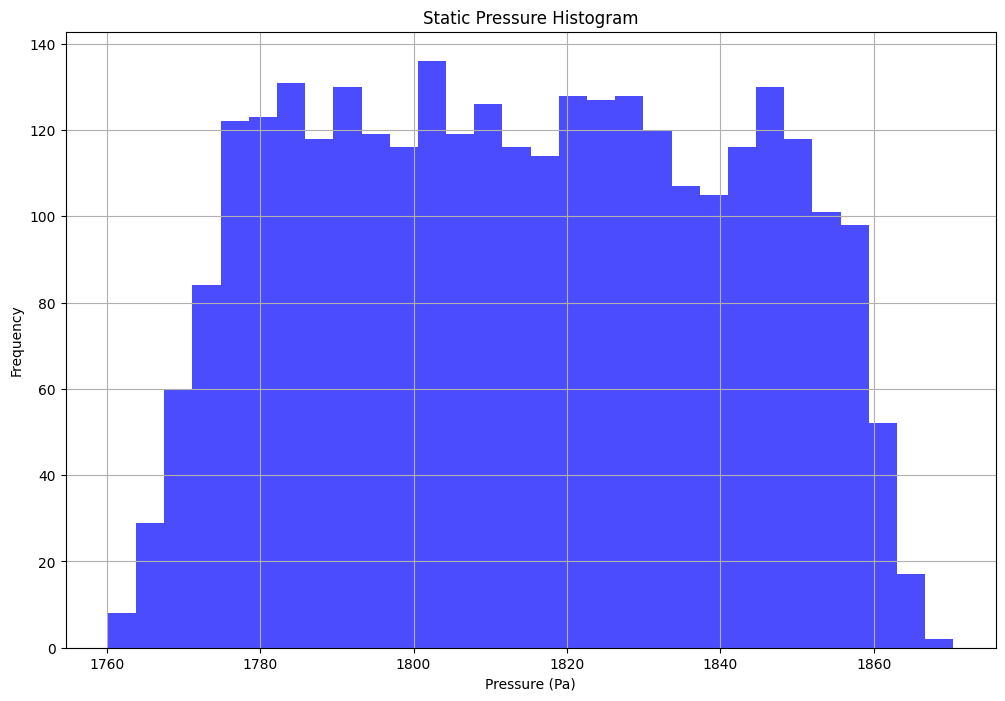

In [66]:
# Static Pressure values on histogram
plt.figure(figsize=(12,8))
plt.hist(pressure['P_static_Pa'], bins=30, color='blue', alpha=0.7)
plt.title('Static Pressure Histogram')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

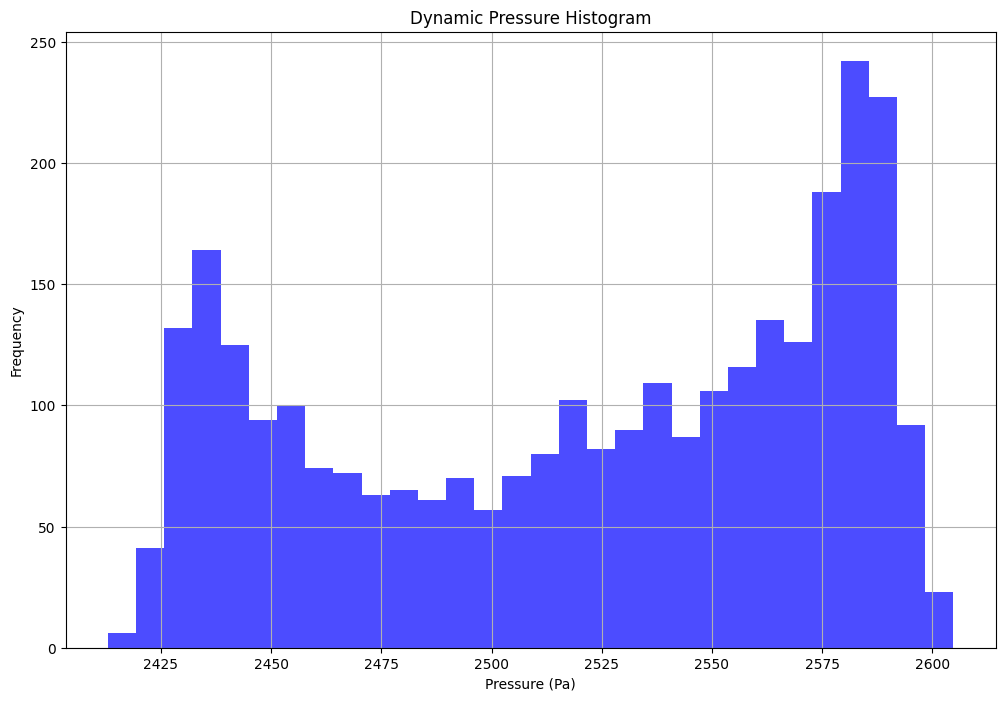

In [67]:
# Dynamic Pressure values on histogram
plt.figure(figsize=(12,8))
plt.hist(pressure['P_dynamic_Pa'], bins=30, color='blue', alpha=0.7)
plt.title('Dynamic Pressure Histogram')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

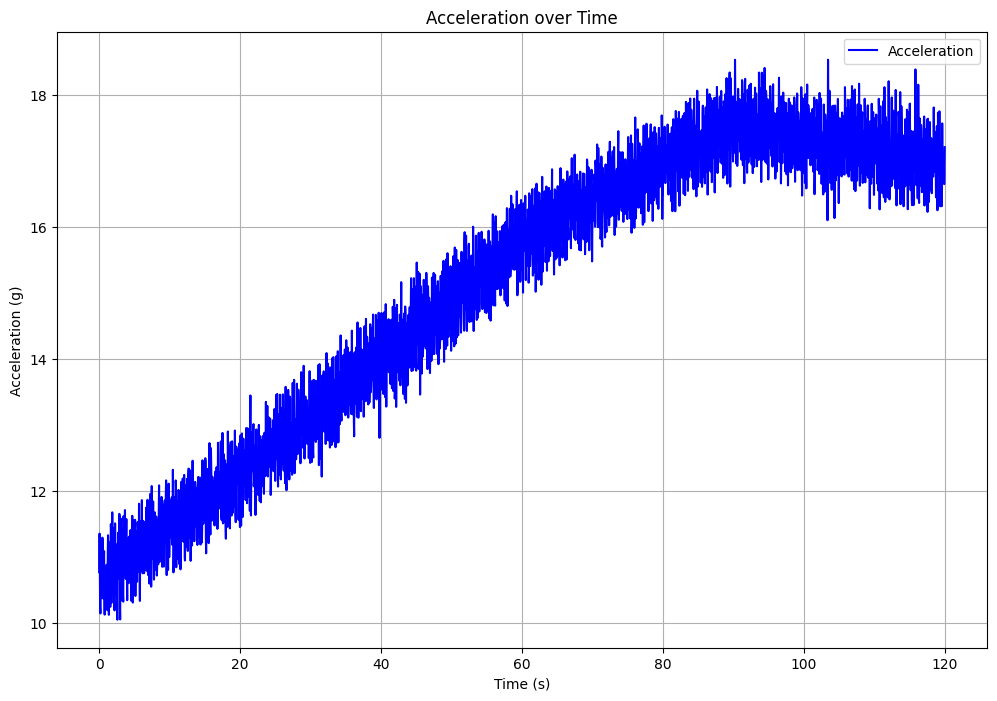

In [68]:
# Plot of the acceleration over time
plt.figure(figsize=(12,8))
plt.plot(accel['t_s'].to_numpy(), accel['Accel_m_per_s2'].to_numpy(), label='Acceleration', color='blue')
plt.title('Acceleration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid()
plt.show()

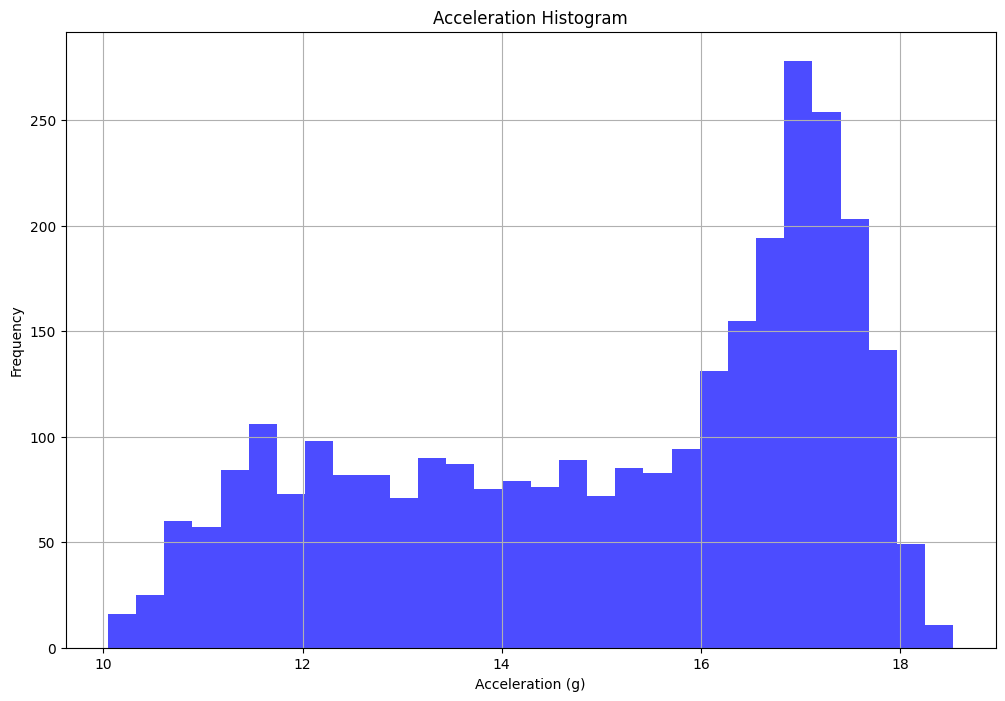

In [69]:
# Histogram of the acceleration values
plt.figure(figsize=(12,8))
plt.hist(accel['Accel_m_per_s2'], bins=30, color='blue', alpha=0.7)
plt.title('Acceleration Histogram')
plt.xlabel('Acceleration (g)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Mach Computation

In [70]:
# Define the function f(M) based on the given compressible flow equation from the problem
def mach_equation(M, gamma, Pt_over_Ps):
    term1 = 2 / (gamma + 1)
    term2 = 1 + ((gamma - 1) / 2) * M**2
    exponent = gamma / (gamma - 1)
    return (term1 * term2)**exponent - Pt_over_Ps

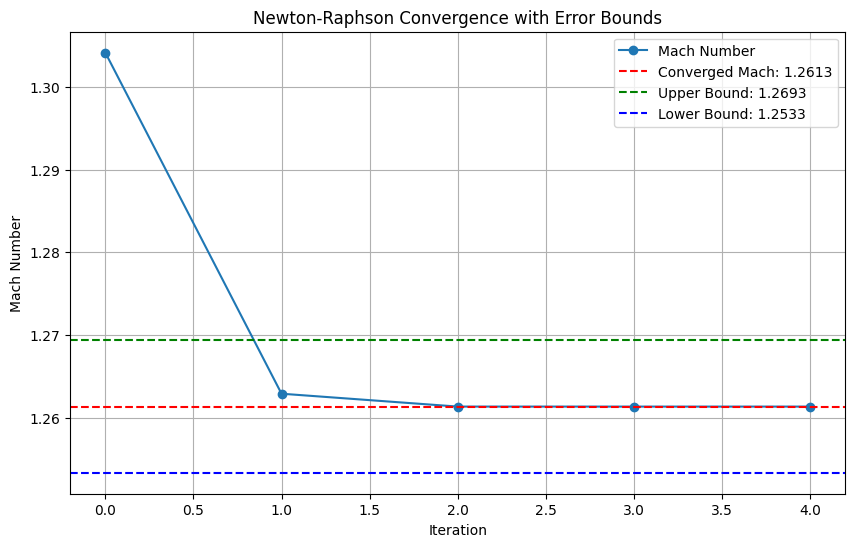

Converged Mach Number: 1.2613
Iterations: 4
Mach Number with Error: 1.2693
Error Propagation: 0.0080
Upper Bound: 1.2693
Lower Bound: 1.2533


In [71]:
# Here is the newton-raphson method to compute the Mach number
# This function uses the Newton-Raphson method to find the root of the mach_equation function
def newton_raphson_mach(Pt_over_Ps, gamma=1.4, tol=1e-6, max_iter=100):
    """
    Newton-Raphson method to compute Mach number.
    :param Pt_over_Ps: Total pressure over static pressure ratio
    :param gamma: Ratio of specific heats (default is 1.4 for air)
    :param tol: Tolerance for convergence
    :param max_iter: Maximum number of iterations
    :return: Mach number, number of iterations, and convergence history
    """
    # Initial guess for Mach number
    M = 1.5
    iterations = 0
    convergence_history = []

    for _ in range(max_iter):
        # Compute the function value and its derivative
        f = mach_equation(M, gamma, Pt_over_Ps)
        df = (mach_equation(M + 1e-6, gamma, Pt_over_Ps) - f) / 1e-6  # Numerical derivative

        # Update Mach number using Newton-Raphson formula
        M_new = M - f / df
        convergence_history.append(M_new)

        # Check for convergence
        if abs(M_new - M) < tol:
            break

        M = M_new
        iterations += 1

    return M, iterations, convergence_history


# Example usage
Pt_over_Ps = pressure['P_dynamic_Pa'].to_numpy() / pressure['P_static_Pa'].to_numpy()
M, iterations, convergence_history = newton_raphson_mach(Pt_over_Ps.mean())

# Propagate errors
bias = 0.01  # Example bias
noise = 0.005  # Example noise
Pt_over_Ps_with_error = Pt_over_Ps.mean() + bias + noise
M_with_error, _, _ = newton_raphson_mach(Pt_over_Ps_with_error)
# Calculate propagated error
propagated_error = abs(M_with_error - M)

# Calculate upper and lower bounds
M_upper = M + propagated_error
M_lower = M - propagated_error

# Visualize convergence with error bounds
plt.figure(figsize=(10, 6))
plt.plot(convergence_history, marker='o', label='Mach Number')
plt.axhline(y=M, color='r', linestyle='--', label=f'Converged Mach: {M:.4f}')
plt.axhline(y=M_upper, color='g', linestyle='--', label=f'Upper Bound: {M_upper:.4f}')
plt.axhline(y=M_lower, color='b', linestyle='--', label=f'Lower Bound: {M_lower:.4f}')
plt.title('Newton-Raphson Convergence with Error Bounds')
plt.xlabel('Iteration')
plt.ylabel('Mach Number')
plt.legend()
plt.grid()
plt.show()

# Print results with error bounds
print(f"Converged Mach Number: {M:.4f}")
print(f"Iterations: {iterations}")
print(f"Mach Number with Error: {M_with_error:.4f}")
print(f"Error Propagation: {propagated_error:.4f}")
print(f"Upper Bound: {M_upper:.4f}")
print(f"Lower Bound: {M_lower:.4f}")

# Section B: Thrust Curve Modeling

## EDA

In [72]:
thrust = pd.read_csv('/Users/ben_nicholson/Documents/vs_code/school_work/numerical_analysis/final_project/datasets/Thrust_MainEngine.csv')

thrust

,t_s,Thrust_kN
0,0.000000,821.492110
1,0.040013,823.514291
2,0.080027,817.369258
3,0.120040,815.367970
4,0.160053,817.691475
...,...,...
2995,119.839947,827.464856
2996,119.879960,819.435711
2997,119.919973,833.492598
2998,119.959987,833.656239


Text(0, 0.5, 'Thrust (kN)')

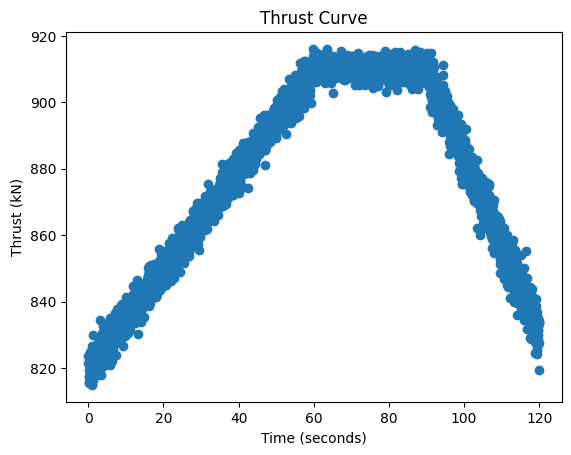

In [73]:
# get the thrust curve
plt.scatter(thrust['t_s'],thrust['Thrust_kN'])
plt.title('Thrust Curve')
plt.xlabel('Time (seconds)')
plt.ylabel('Thrust (kN)')

There are too many points to interpolate, we will select random points throughout the curve to then interpolate.

## Randomize interpolation data

In [74]:
# using then numpy package call the random choice
# this is going to randomly select time values to train the interpolation on

# set the random seed to 42 
np.random.seed(21)
random_thrust_time = np.random.choice(thrust['t_s'].values,size=10)

In [75]:
# now get the values that are located within the random time selection
random_thrust_df = thrust[thrust['t_s'].isin(random_thrust_time)]

Text(0, 0.5, 'Thrust (kN)')

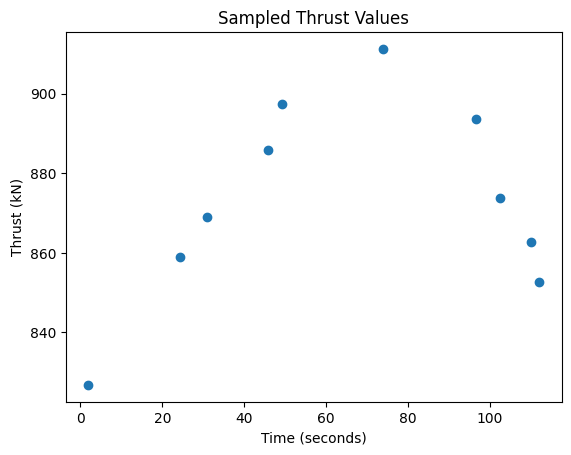

In [76]:
plt.scatter(random_thrust_df['t_s'],random_thrust_df['Thrust_kN'])
plt.title('Sampled Thrust Values')
plt.xlabel('Time (seconds)')
plt.ylabel('Thrust (kN)')

## Create Cubic Spline

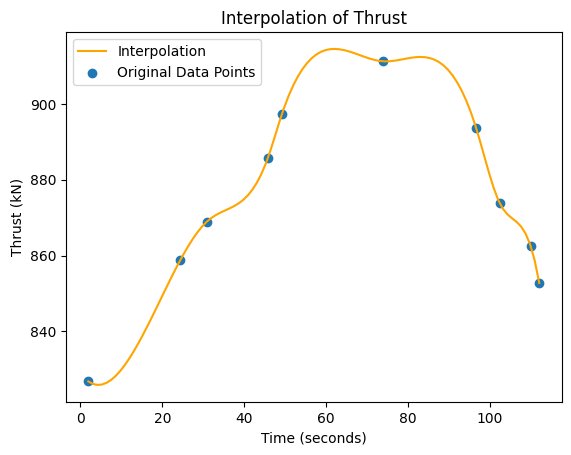

In [77]:
from scipy.interpolate import CubicSpline

x = random_thrust_df['t_s'] # get the 6 random points from the original data
y = random_thrust_df['Thrust_kN'] # get the 6 random values from the original data based on the random x

cs = CubicSpline(x,y) # train the cubic spline on the data

x_pred = np.linspace(x.min(),x.max(),100) # get the x and y values using min and max of x 
y_pred = cs(x_pred)

thrust_df = pd.DataFrame({'t_s':x_pred,'Thrust':y_pred})

plt.plot(x_pred,y_pred,color='Orange',label='Interpolation')
plt.scatter(x,y,label='Original Data Points')
plt.title('Interpolation of Thrust')
plt.xlabel('Time (seconds)')
plt.ylabel('Thrust (kN)')
plt.legend()

In [78]:
# create shape variables
coefficients_n, functions_n = cs.c.shape

print(f'The number of functions are {functions_n} with each having {coefficients_n} coefficients')

The number of functions are 9 with each having 4 coefficients


There are 9 different functions connecting the 10 points, as it is a cubic function there are 4 coeffcients. Lets look at the first spline to see how it is constructed.

In [79]:
# output the first functions coefficients
cs.c[:,0]

array([-3.21433932e-03,  1.70115818e-01, -7.75433690e-01,  8.26813514e+02])

Use the above parameters across the 1st cube spline region

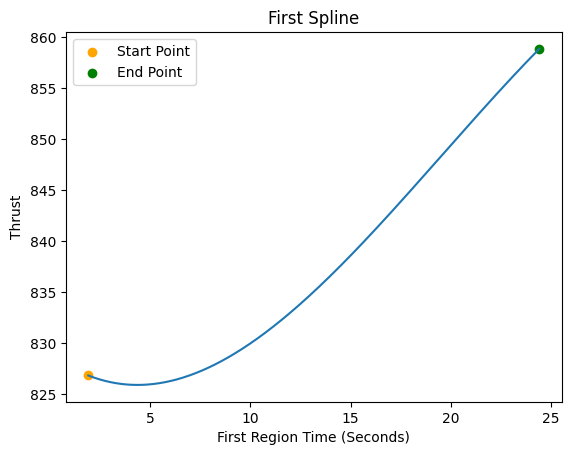

In [80]:
# plot the above coefficients using the spline function
a,b,c,d = cs.c[:,4]

first_region = np.linspace(x.iloc[0],x.iloc[1],1000)

first_spline = spline_poly_i(first_region,0,cs)

plt.plot(first_region,first_spline)
plt.scatter(first_region[0],first_spline[0],color='Orange',label='Start Point')
plt.scatter(first_region[-1],first_spline[-1],color='Green',label='End Point')
plt.title('First Spline')
plt.xlabel('First Region Time (Seconds)')
plt.ylabel('Thrust')
plt.legend()

## Derivative of Cubic Spline Functions

In [81]:
# next we have to compute the derivative of Thrust vs time
cs_derivative = cs.derivative() # this will take the derivative of each original function

Text(0, 0.5, 'Derivative of Thrust (kN)')

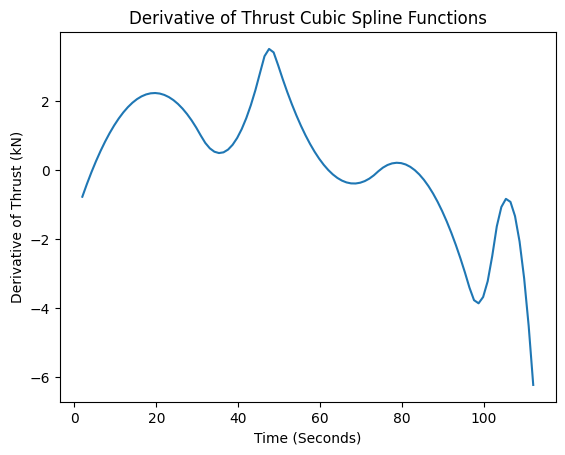

In [82]:
# plot the derivative function
y_pred_derivative = cs_derivative(x_pred)


# plot the derivative funciton
plt.plot(x_pred,y_pred_derivative)
plt.title('Derivative of Thrust Cubic Spline Functions')
plt.xlabel('Time (Seconds)')
plt.ylabel('Derivative of Thrust (kN)')

There is now one less varialbe in the cubic splines.

In [83]:
# combine x_pred and y_pred_derivative
thrust_derivative = pd.DataFrame({'t_s':x_pred,'Thrust_Kn Derivative':y_pred_derivative})

In [84]:
# plot the two functions as normalized values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data_derivative = scaler.fit_transform(thrust_derivative)
normalized_data_thrust = scaler.fit_transform(thrust_df)

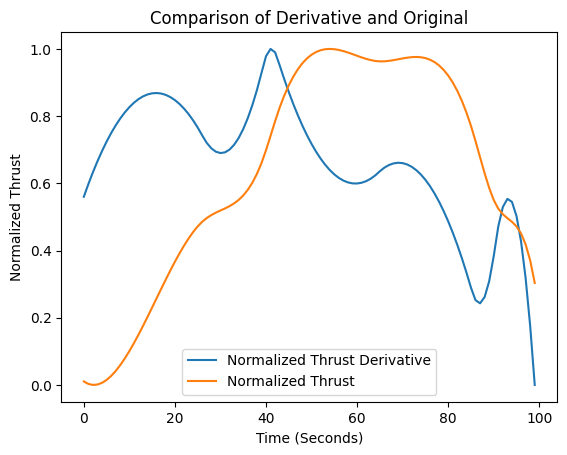

In [85]:
# lets plot the derivative of the first cubic spline
plt.plot(normalized_data_derivative[:,1],label='Normalized Thrust Derivative')
plt.plot(normalized_data_thrust[:,1],label='Normalized Thrust')
plt.xlabel('Time (Seconds)')
plt.ylabel('Normalized Thrust')
plt.title('Comparison of Derivative and Original')
plt.legend()

## Second Order Central Finite Difference

In [86]:
# create a function to find the second order diff
def second_order_diff(cs,x,h):
    derivative = (cs(x+h) - cs(x-h)) / (2 * h)
    return derivative

Lets use different values of h to determine the level required to reach a certain minimum error

In [87]:
h_values = np.linspace(1,0.000001,1000)
errors = []

for values in h_values:
    diff_values = second_order_diff(cs,x_pred,values)
    error = sum((np.abs(diff_values - y_pred_derivative)))

    errors.append(error)

Text(0, 0.5, 'Sum Residual Error')

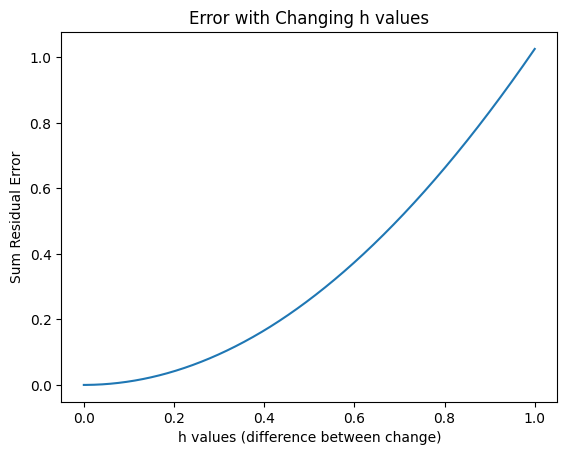

In [88]:
plt.plot(h_values, errors)
plt.title('Error with Changing h values')
plt.xlabel('h values (difference between change)')
plt.ylabel('Sum Residual Error')

Show Burns and ask for what's next.

# Section C: Trajectory Integration

In [89]:
mass = pd.read_csv('/Users/ben_nicholson/Documents/vs_code/school_work/numerical_analysis/final_project/datasets/MassFlow-1.csv')

In [90]:
mass.head()

,t_s,MassFlow_kg_per_s
0,0.000000,450.270359
1,0.040013,454.899977
2,0.080027,455.183226
3,0.120040,450.932966
4,0.160053,450.175233


In [91]:
accel.head()

,t_s,Accel_m_per_s2
0,0.000000,10.766043
1,0.040013,11.351193
2,0.080027,10.691564
3,0.120040,10.238034
4,0.160053,10.141102


In [92]:
thrust.head()

,t_s,Thrust_kN
0,0.000000,821.492110
1,0.040013,823.514291
2,0.080027,817.369258
3,0.120040,815.367970
4,0.160053,817.691475


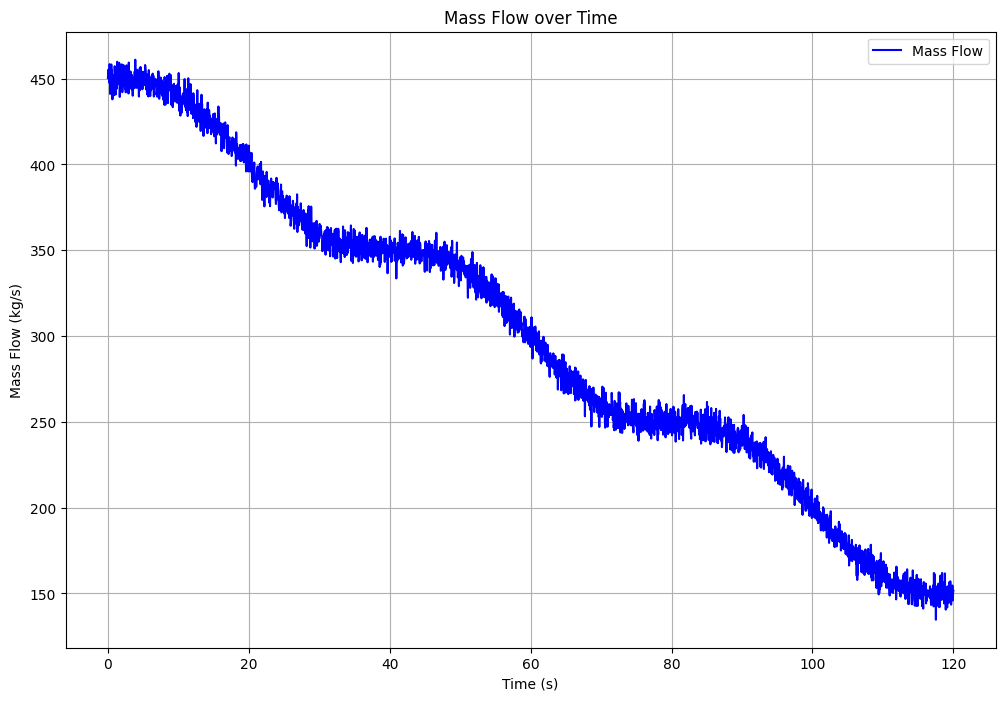

In [103]:
# Figure of mass flow over time
plt.figure(figsize=(12,8))
plt.plot(mass['t_s'].to_numpy(), mass['MassFlow_kg_per_s'].to_numpy(), label='Mass Flow', color='blue')
plt.title('Mass Flow over Time')
plt.xlabel('Time (s)')
plt.ylabel('Mass Flow (kg/s)')
plt.legend()
plt.grid()
plt.show()


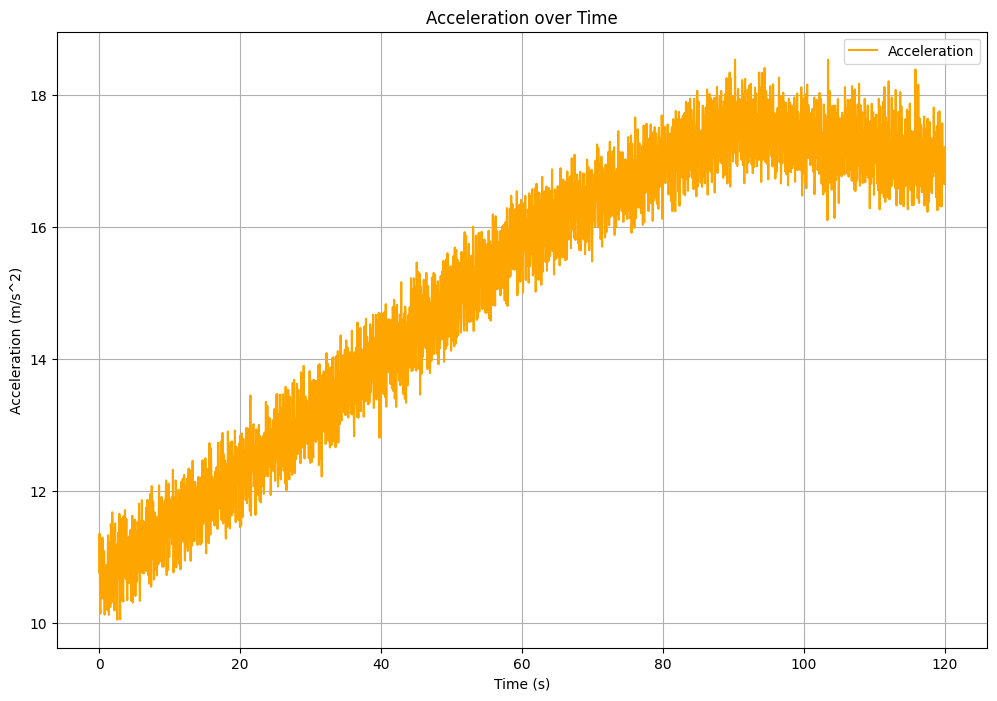

In [104]:
# Plot of the acceleration over time
plt.figure(figsize=(12,8))
plt.plot(accel['t_s'].to_numpy(), accel['Accel_m_per_s2'].to_numpy(), label='Acceleration', color='orange')
plt.title('Acceleration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid()
plt.show()

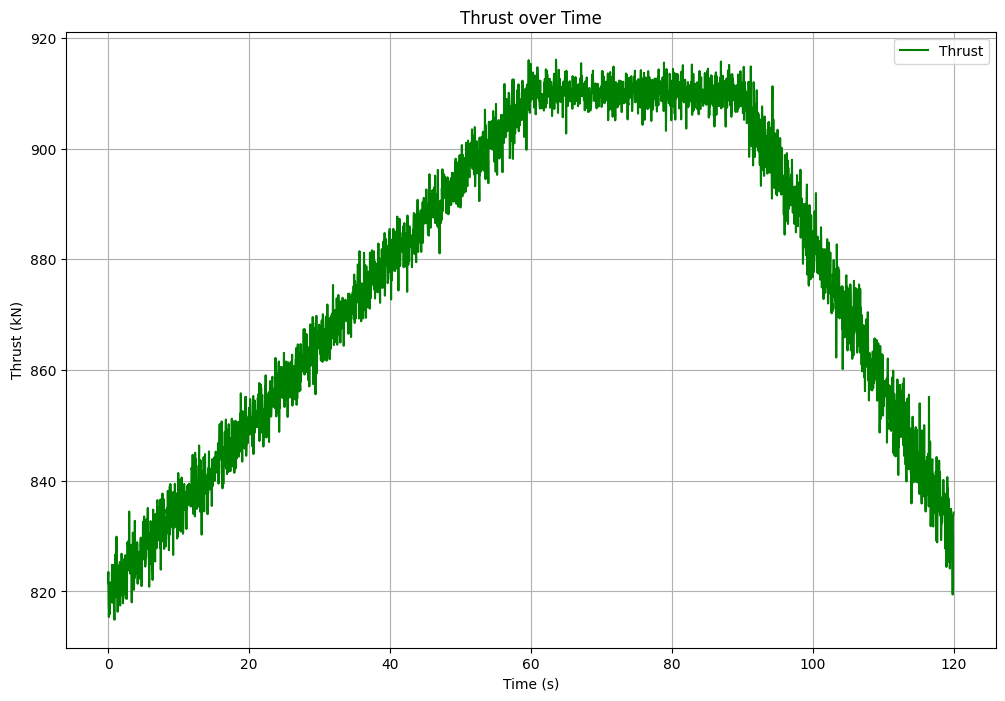

In [105]:
# Plot of the thrust over time
plt.figure(figsize=(12,8))
plt.plot(thrust['t_s'].to_numpy(), thrust['Thrust_kN'].to_numpy(), label='Thrust', color='green')
plt.title('Thrust over Time')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (kN)')
plt.legend()
plt.grid()
plt.show()

### Comptuing the Trajectory:

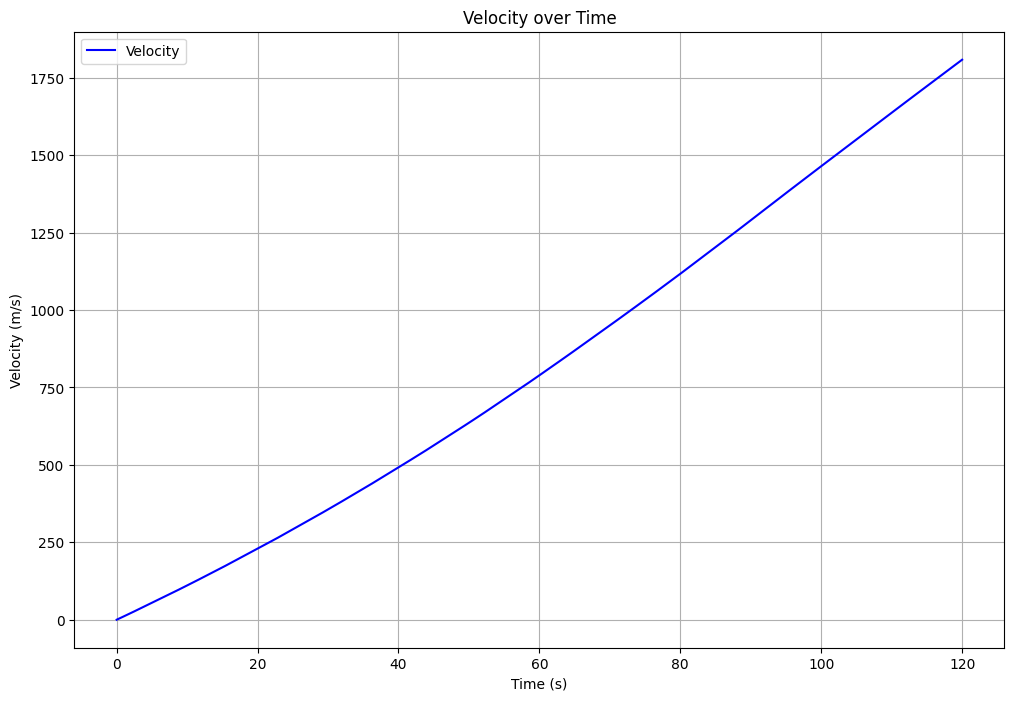

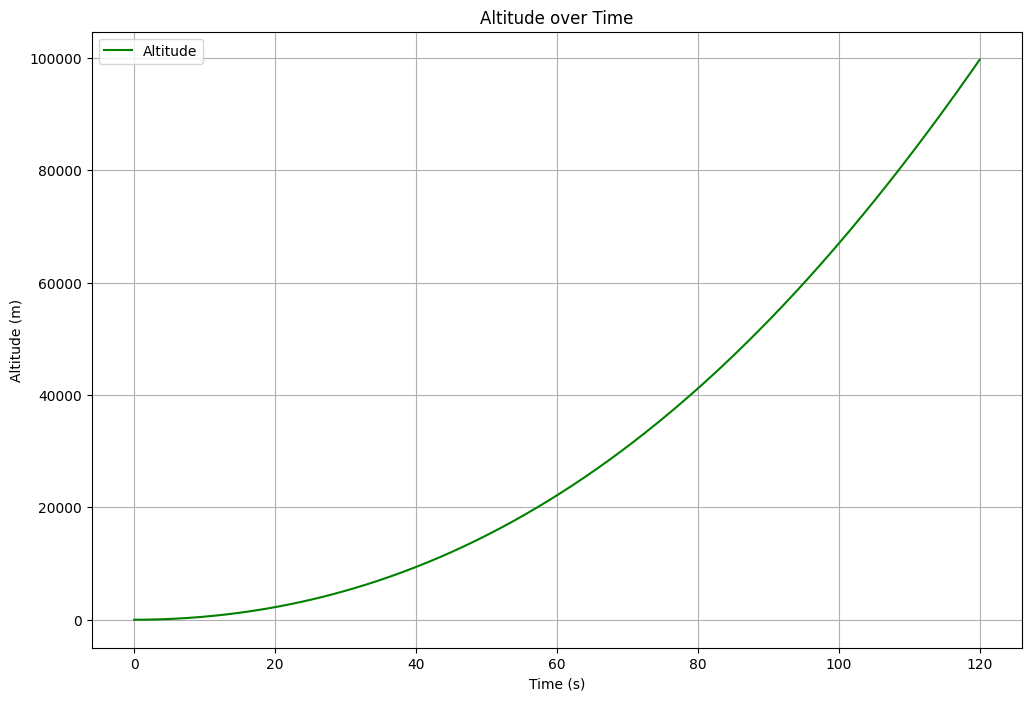

In [106]:
from scipy.integrate import cumulative_trapezoid

# Extract time and acceleration data
time = accel['t_s'].to_numpy()
acceleration = accel['Accel_m_per_s2'].to_numpy()

# Integrate acceleration to compute velocity
velocity = cumulative_trapezoid(acceleration, time, initial=0)

# Integrate velocity to compute altitude
altitude = cumulative_trapezoid(velocity, time, initial=0)

# Plot velocity over time
plt.figure(figsize=(12, 8))
plt.plot(time, velocity, label='Velocity', color='blue')
plt.title('Velocity over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid()
plt.show()

# Plot altitude over time
plt.figure(figsize=(12, 8))
plt.plot(time, altitude, label='Altitude', color='green')
plt.title('Altitude over Time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.legend()
plt.grid()
plt.show()

In [107]:
from scipy.integrate import simpson

# Extract time and mass flow rate data
time_mass = mass['t_s'].to_numpy()
mass_flow_rate = mass['MassFlow_kg_per_s'].to_numpy()

# Estimate the total fuel mass using Simpson's rule
total_fuel_mass_simpson = simpson(mass_flow_rate, x=time_mass)

# Print the estimated total fuel mass
print(f"Estimated Total Fuel Mass (Simpson's Rule): {total_fuel_mass_simpson:.2f} kg")

Estimated Total Fuel Mass (Simpson's Rule): 36009.65 kg


# Section D: Thermal Shield Optimization
We will use 200 nodes to describe a thickness L. The L needs to be determined to understand the thickness of the heat shield.

## EDA

In [93]:
thermal = pd.read_csv('/Users/ben_nicholson/Documents/vs_code/school_work/numerical_analysis/final_project/datasets/HeatShield_Temp-1.csv')

thermal

,t_s,Temp_K
0,0.000000,281.719257
1,0.100033,288.608432
2,0.200067,295.521193
3,0.300100,290.256304
4,0.400133,293.820543
...,...,...
2995,299.599867,1748.509080
2996,299.699900,1760.944797
2997,299.799933,1755.995163
2998,299.899967,1753.858832


Text(0, 0.5, 'Thermal Temperature (K)')

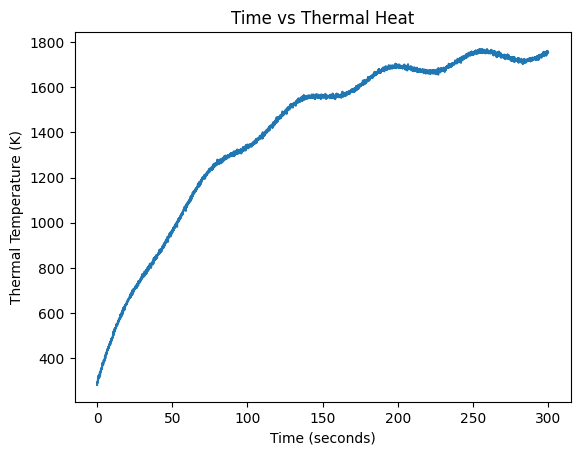

In [94]:
plt.plot(thermal['t_s'],thermal['Temp_K'])
plt.title('Time vs Thermal Heat')
plt.xlabel('Time (seconds)')
plt.ylabel('Thermal Temperature (K)')

## Set up Heat Shield Matrix
The 200 nodes represent the movement of heat at any point from the outside to the inside. So we will construct a 1d hat conduction

In [95]:
import numpy as np

def heat_conduction_system(n, L, T0, Tn, k):
    dx = L / (n + 1)
    a = c = -k / dx**2
    b = 2 * k / dx**2

    A = np.diag([b] * n) + np.diag([a] * (n - 1), 1) + np.diag([c] * (n - 1), -1)
    rhs_vector = np.zeros(n) # the boundary conditions
    rhs_vector[0] -= a * T0 # this is the outside node
    rhs_vector[-1] -= c * Tn # this is the inside node
    return A, rhs_vector

In [96]:
# use the last temperature as an example
last_temp = thermal['Temp_K'].iloc[-1]

In [97]:
A,rhs = heat_conduction_system(200,0.01,last_temp,0,237)

In [98]:
def tridiagonal_LU(A): # this creates the L and U
    n = A.shape[0] 
    L = np.eye(n) # np.eye is used to create an identity matrix
    U = A.copy() # get a copy of the original matrix A

    for i in range(1, n):
        factor = U[i, i-1] / U[i-1, i-1]
        L[i, i-1] = factor
        U[i] = U[i] - factor * U[i-1]

    return L, U

def solve_LU(L, U, b):
    # Forward solve: L y = b
    y = np.zeros_like(b)
    for i in range(len(b)):
        y[i] = b[i] - L[i, :i] @ y[:i]

    # Backward solve: U x = y
    x = np.zeros_like(b)
    for i in reversed(range(len(b))):
        x[i] = (y[i] - U[i, i+1:] @ x[i+1:]) / U[i, i]
    return x


In [99]:
L,U = tridiagonal_LU(A)

In [100]:
temps = solve_LU(L,U,rhs)

Text(0, 0.5, 'Temperature (K)')

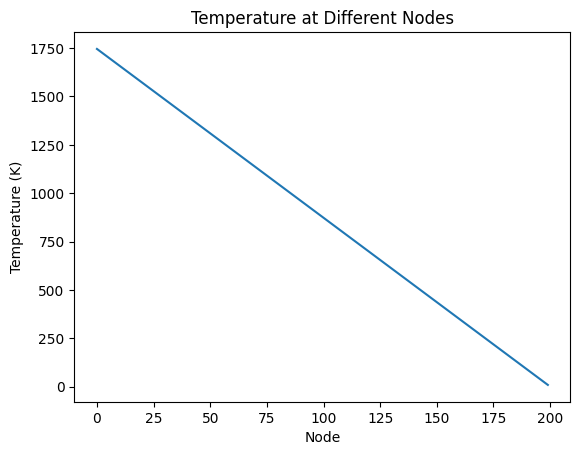

In [101]:
plt.plot(temps)
plt.title('Temperature at Different Nodes')
plt.xlabel('Node')
plt.ylabel('Temperature (K)')

In [144]:
temps.max()

1745.819822955953

In [143]:
temps.min()

8.729099114779693

This shows the change in temperature from the outside node to the inside node.

## Conditional Number

In [102]:
# compute the condition number
cond_A = np.linalg.cond(A)
print(cond_A)

16373.241898710936
